# Tech challenge - Grupo 9 - É chikungunya?

Criar um modelo que consiga dizer se uma pessoa tem chikungunya.

## Sobre o projeto

A base utilizada foi do portal do [gov.br - dados abertos](https://dadosabertos.saude.gov.br/) com os dados de notificações de pessoas com possível chikungunya.

### Dicionário de dados das colunas utilizadas

Sinais clínicos - 1 Sim / 2 Não
- FEBRE : Febre
- MIALGIA: Mialgia
- CEFALEIA: Cefaleia
- EXANTEMA: Exantema
- VOMITO: Vômito
- NAUSEA: Náusea
- DOR_COSTAS: Dor nas costas
- CONJUNTVIT: Conjuntivite
- ARTRITE: Artrite
- ARTRALGIA: Artralgia intensa
- PETEQUIA_N: Petéquias
- LEUCOPENIA: Leucopenia
- LACO: Prova do laço
- DOR_RETRO: Dor retroorbital

Comorbidades - 1 Sim / 2 Não
- DIABETES: Diabetes
- HEMATOLOG: Doenças hematológicas
- HEPATOPAT: Hepatopatias
- RENAL: Doença renal crônica
- HIPERTENSA: Hipertensão arterial
- ACIDO_PEPT: Doença ácido-péptica
- AUTO_IMUNE: Doenças auto-imunes

Exames
- HISTOPA_N: Resultado Histopatologia - 1 Reagente / 2  Não Reagente / 3 Inconclusivo / 4 Não realizado
- IMUNOH_N: Resultado Imunohistoquímica - 1 Reagente / 2  Não Reagente / 3 Inconclusivo / 4 Não realizado
- RESUL_PCR: RT-PCR Resultado - 1 Reagente / 2  Não Reagente / 3 Inconclusivo / 4 Não realizado
- RESUL_VI_N: Isolamento Viral Resultado - 1 Reagente / 2  Não Reagente / 3 Inconclusivo / 4 Não realizado
- RESUL_PRNT: Exame PRNT Resultado - 1 Reagente / 2  Não Reagente / 3 Inconclusivo / 4 Não realizado
- CLINC_CHIK: Apresentação clínica Chikungunya - 1 Aguda / 2 Crônica

Target
- CLASSI_FIN: 
	- 5 Não tem chikungunya / 13 = Tem dengue chikungunya

Dados
- NU_IDADE_N: Idade
- ID_MN_RESI: Município de residência

[Dicionário de dados completo](./dic_dados_chikungunya.pdf) (PDF)

### Resumo

Dataset original contém 245.541 registros com 122 características/colunas.

54 colunas estão com mais de 99% em branco e foram removidas. 

Os algoritmos testados foram: 
- Liner Regression
- Random Forest Regressorn
- Random Forest Classifier
- KNeighbors Classifier
- XGBoost
- LightGBM


### Links Úteis

- [Informações sobre a base de dados](https://dadosabertos.saude.gov.br/dataset/arboviroses-febre-de-chikungunya) (link externo)
- [Base de dados 2025](./dados/CHIKBR25.csv) (CSV)


## Variáveis auxiliares

- df_original: valor do dataframe sem modificação
- df_original_without_null_columns: valor do dataframe original sem 54 colunas que possuiam +99% de valores nulos
- df: valor do dataframe modificado ao longo dos blocos
- cols_sintomas: nomes de colunas relacionadas a sintomas
- cols_comorbidades: nomes de colunas relacionadas a sintomas 
- cols_exames: nomes de colunas relacionadas a exame
- col_target: nome da coluna target
- colunas_selecionada: soma de todas as colunas

## Requisitos

In [1]:
%%capture 

! pip install -r requirements.txt

## Importações e configurações

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df_original = pd.read_csv("./dados/CHIKBR25.csv", low_memory=False)
df_original.head()

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_CHIK_S1,DT_CHIK_S2,DT_PRNT,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,CLASSI_FIN,CRITERIO,DOENCA_TRA,CLINC_CHIK,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_ABDOM,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ,DT_ALRM,GRAV_PULSO,GRAV_CONV,GRAV_ENCH,GRAV_INSUF,GRAV_TAQUI,GRAV_EXTRE,GRAV_HIPOT,GRAV_HEMAT,GRAV_MELEN,GRAV_METRO,GRAV_SANG,GRAV_AST,GRAV_MIOC,GRAV_CONSC,GRAV_ORGAO,DT_GRAV,MANI_HEMOR,EPISTAXE,GENGIVO,METRO,PETEQUIAS,HEMATURA,SANGRAM,LACO_N,PLASMATICO,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,NU_LOTE_I,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,CS_FLXRET,FLXRECEBI,MIGRADO_W
0,2,A920,2024-12-30,202501,2024,32,320060,32001.00,2449218.00,2024-12-30,202501,1989.00,4035,F,5.00,1,6.00,32,320060.00,32001.00,1,2024-12-30,10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,4.00,NaN,4.00,NaN,4.00,NaN,NaN,NaN,2.00,NaN,NaN,NaN,1.00,NaN,NaN,NaN,5.00,1.00,NaN,NaN,9.00,NaN,2025-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-30,NaN,NaN,NaN
1,2,A920,2024-12-30,202501,2024,32,320405,32003.00,2484536.00,2024-12-29,202501,1980.00,4044,M,5.00,4,9.00,32,320405.00,32003.00,1,2024-12-30,10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-30,1.00,NaN,NaN,NaN,2.00,NaN,NaN,NaN,1.00,NaN,NaN,NaN,13.00,1.00,NaN,NaN,1.00,NaN,2025-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-30,NaN,NaN,NaN
2,2,A920,2024-12-30,202501,2024,32,320130,32002.00,2494450.00,2024-12-29,202501,1996.00,4028,M,6.00,4,9.00,32,320130.00,32002.00,1,2024-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,2.00,NaN,NaN,NaN,1.00,NaN,NaN,NaN,5.00,1.00,NaN,NaN,9.00,NaN,2025-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-30,NaN,NaN,NaN
3,2,A920,2024-12-30,202501,2024,32,320130,32002.00,2494450.00,2024-12-29,202501,1979.00,4045,F,5.00,1,9.00,32,320130.00,32002.00,1,2024-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,2.00,NaN,NaN,NaN,1.00,NaN,NaN,NaN,5.00,1.00,NaN,NaN,9.00,NaN,2025-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-30,NaN,NaN,NaN
4,2,A920,2024-12-30,202501,2024,32,320130,32002.00,2494450.00,2024-12-29,202501,2008.00,4016,F,5.00,4,9.00,32,320130.00,32002.00,1,2024-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,2.00,NaN,NaN,NaN,1.00,NaN,NaN,NaN,5.00,1.00,NaN,NaN,9.00,NaN,2025-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-30,NaN,NaN,NaN

## Criação de variaveis

In [4]:
cols_sintomas = [
		'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS',
		'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA', 'LACO',
		'DOR_RETRO'
]

cols_comorbidades = [
		'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA',
		'ACIDO_PEPT', 'AUTO_IMUNE', 
]

cols_exames = [
		'HISTOPA_N', 'IMUNOH_N', 'RESUL_PCR_', 'RESUL_VI_N', 
		# 'RESUL_PRNT'
]

col_target = [
		'CLASSI_FIN', 
]

# Colunas adicionais para análise de contexto e fatores demográficos
colunas_adicionais = [
	'NU_IDADE_N', 
	'ID_MN_RESI', 
]

colunas_selecionadas = cols_sintomas + cols_comorbidades + cols_exames + colunas_adicionais + col_target

df = df_original[colunas_selecionadas].copy()

## Análise Exploratória de Dados (EDA)

In [5]:
# Quantidade de linhas e colunas
df_original.shape

(248541, 122)

In [6]:
# Analisando as informações do dataset
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248541 entries, 0 to 248540
Columns: 122 entries, TP_NOT to MIGRADO_W
dtypes: float64(94), int64(10), object(18)
memory usage: 231.3+ MB


### A coluna target está equilibrada? 

- 5 = Não tem chikungunya
- 13 = Tem chikungunya


Observação: A quantidade entre casos com e sem chickungunya está bem parecido

In [7]:
df['TARGET'] = df['CLASSI_FIN'].map({13.0: 1, 5.0: 0})
df = df.dropna(subset=['CLASSI_FIN'])

(array([118495.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 108185.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

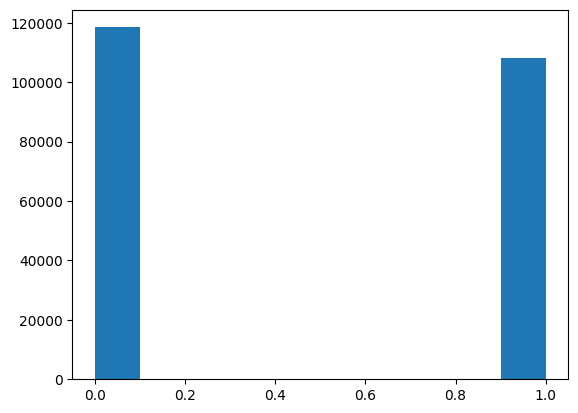

In [8]:
plt.hist(df['TARGET']) 

### Analise NU_ANO

In [9]:
df_original['NU_ANO'].value_counts()

NU_ANO
2025    248317
2024       200
2026        24
Name: count, dtype: int64

*Curiosidade:* a coluna "NU_ANO" indica que há notificações fora do ano de 2025. Isso é possível pois ocorreu a notificacao final de 2024, mas a analise dos sintomas foi concluído em 2025.

In [10]:
df_original.loc[df_original['NU_ANO'] == 2024, ['NU_ANO', 'DT_ENCERRA']].head()

,NU_ANO,DT_ENCERRA
0,2024,2025-01-17
1,2024,2025-01-17
2,2024,2025-02-04
3,2024,2025-02-04
4,2024,2025-02-04


### Análise e tratamento de Valores Nulos


<Axes: >

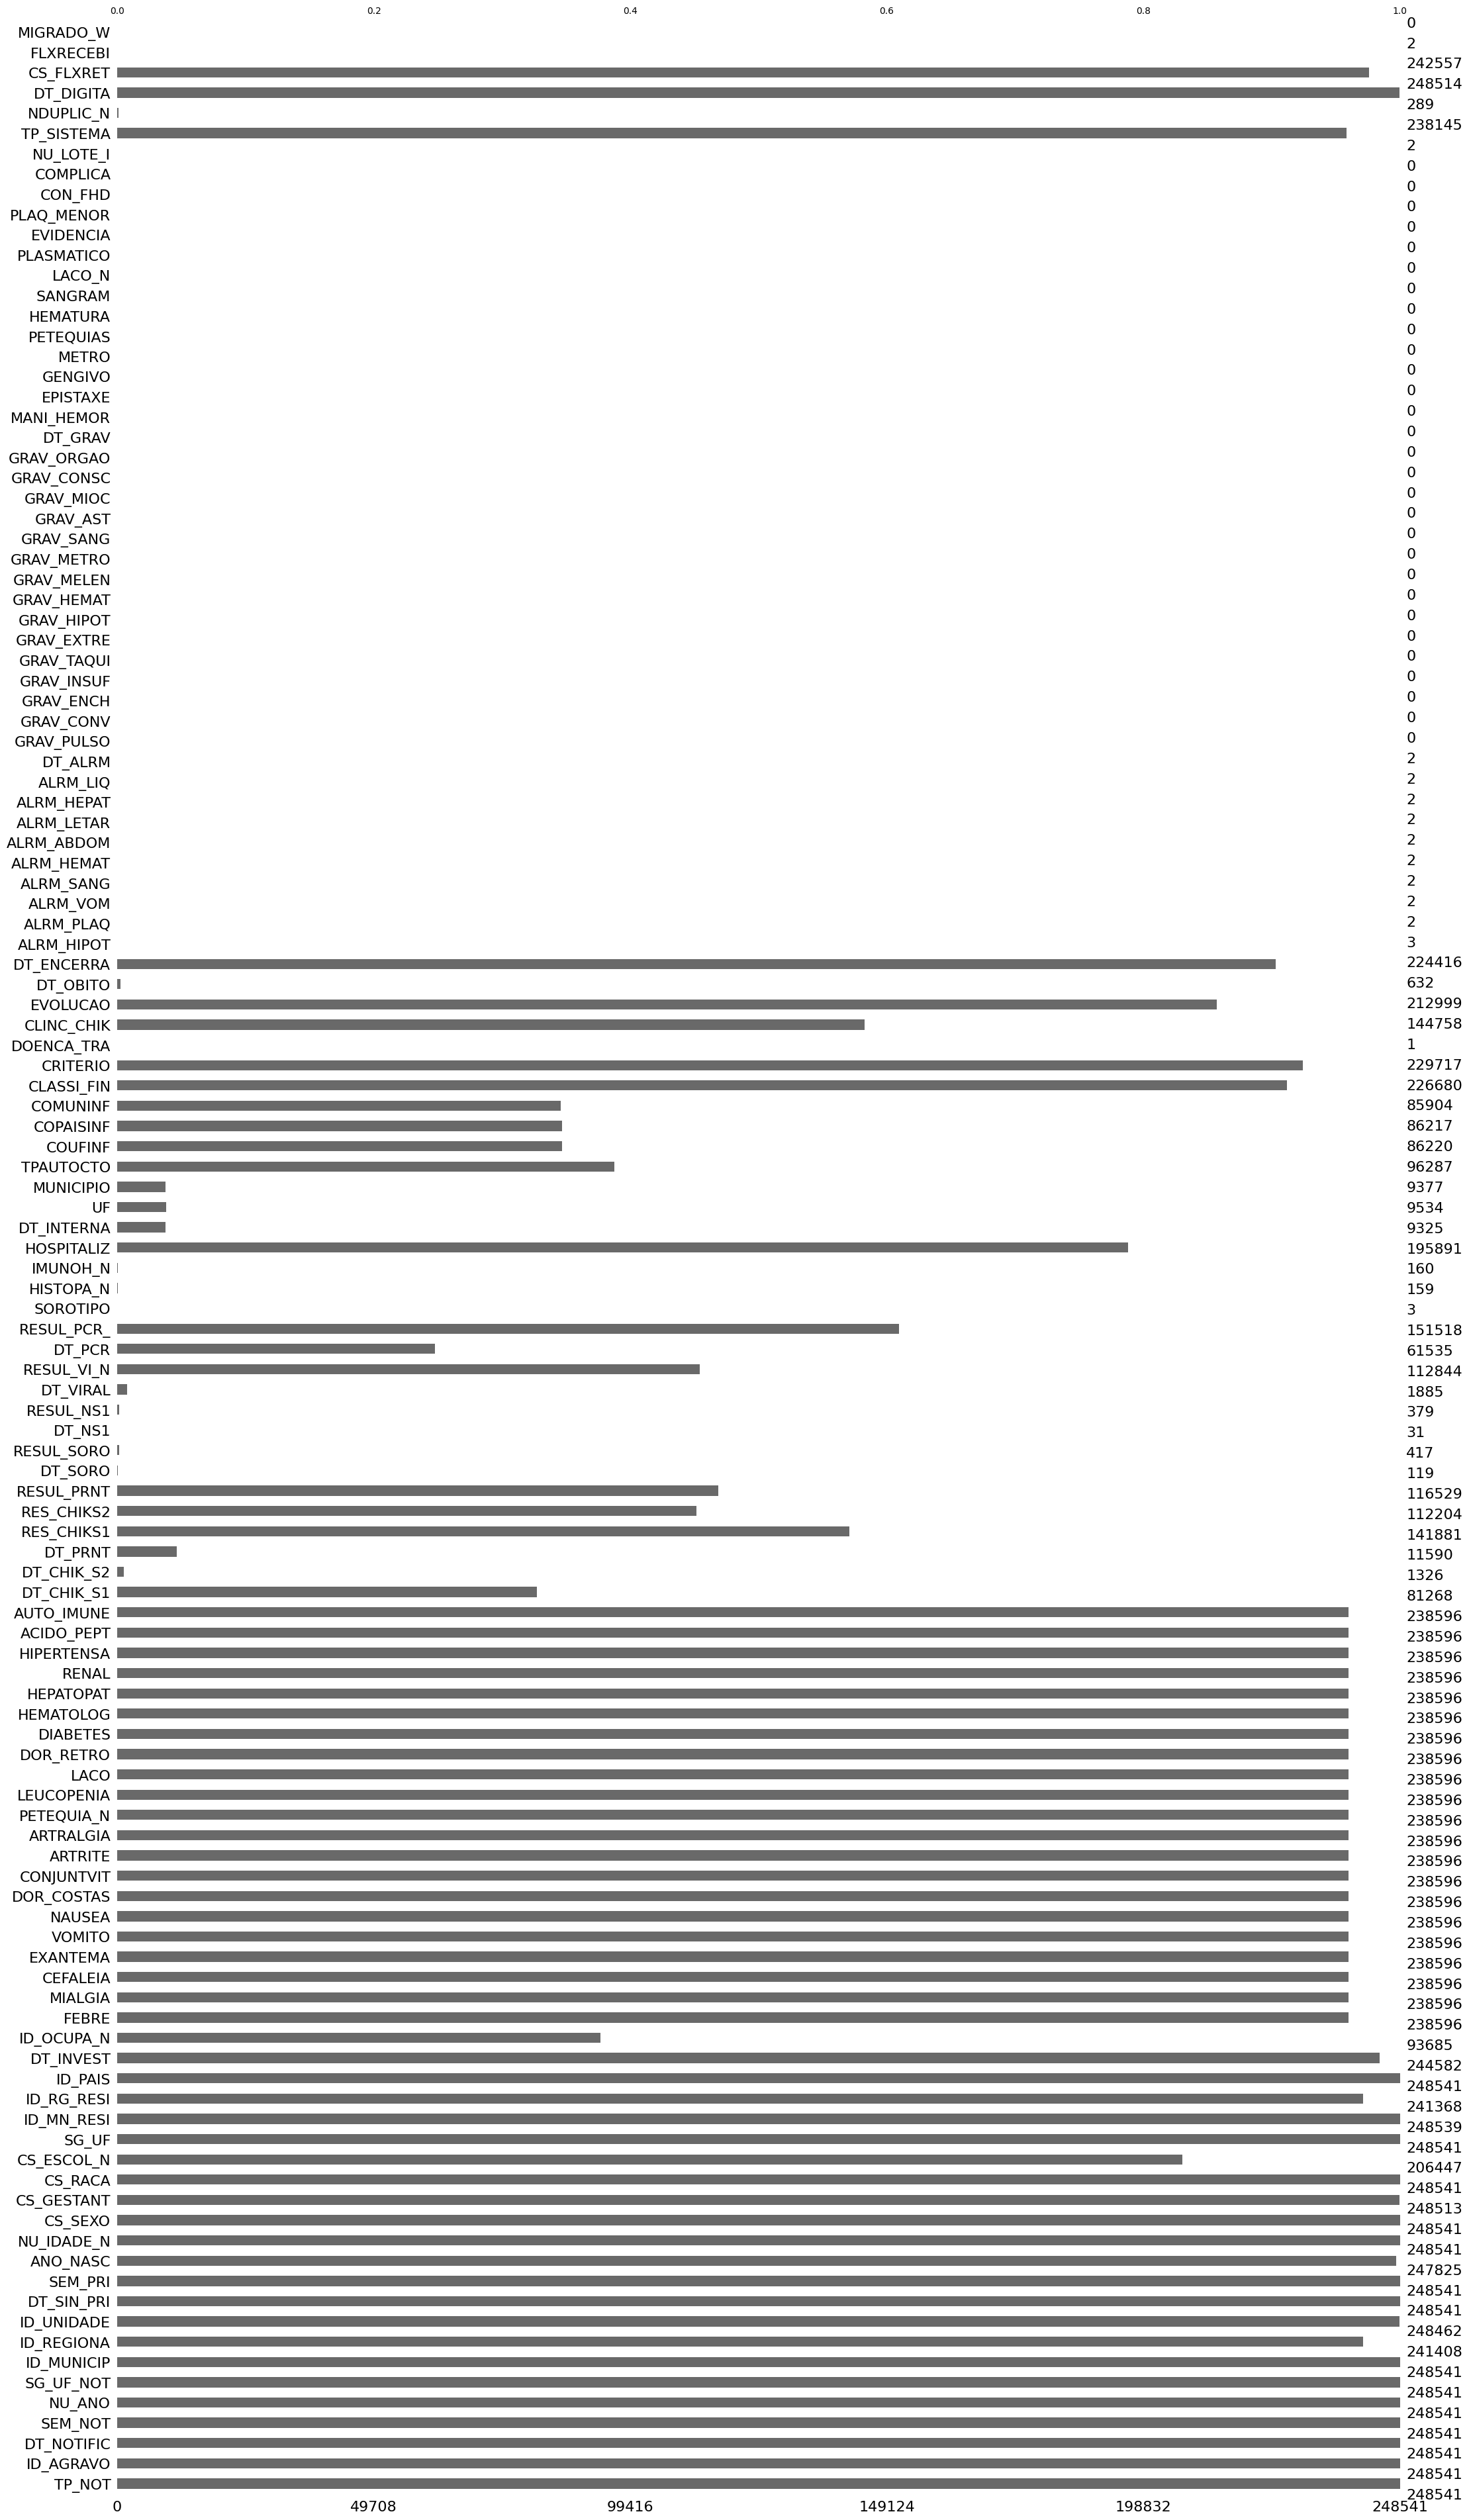

In [11]:
msno.bar(df_original)

In [12]:
# Remover colunas com mais de 99% de valores nulos
null_ratio = df.isnull().mean()
null_threshold = 0.99

# Identificar colunas que serão removidas
colunas_para_remover = null_ratio[null_ratio >= null_threshold].index.tolist()
print(f"\nColunas que serão removidas (>= {null_threshold*100}% nulos): {colunas_para_remover}")
print(f"Total de colunas a remover: {len(colunas_para_remover)}")

# Remover colunas com mais de 99% de valores nulos
df = df.loc[:, df.isnull().mean() < null_threshold]

print(f"\nApós remoção por nulos: {df.shape}")


Colunas que serão removidas (>= 99.0% nulos): ['HISTOPA_N', 'IMUNOH_N']
Total de colunas a remover: 2

Após remoção por nulos: (226680, 27)


<Axes: >

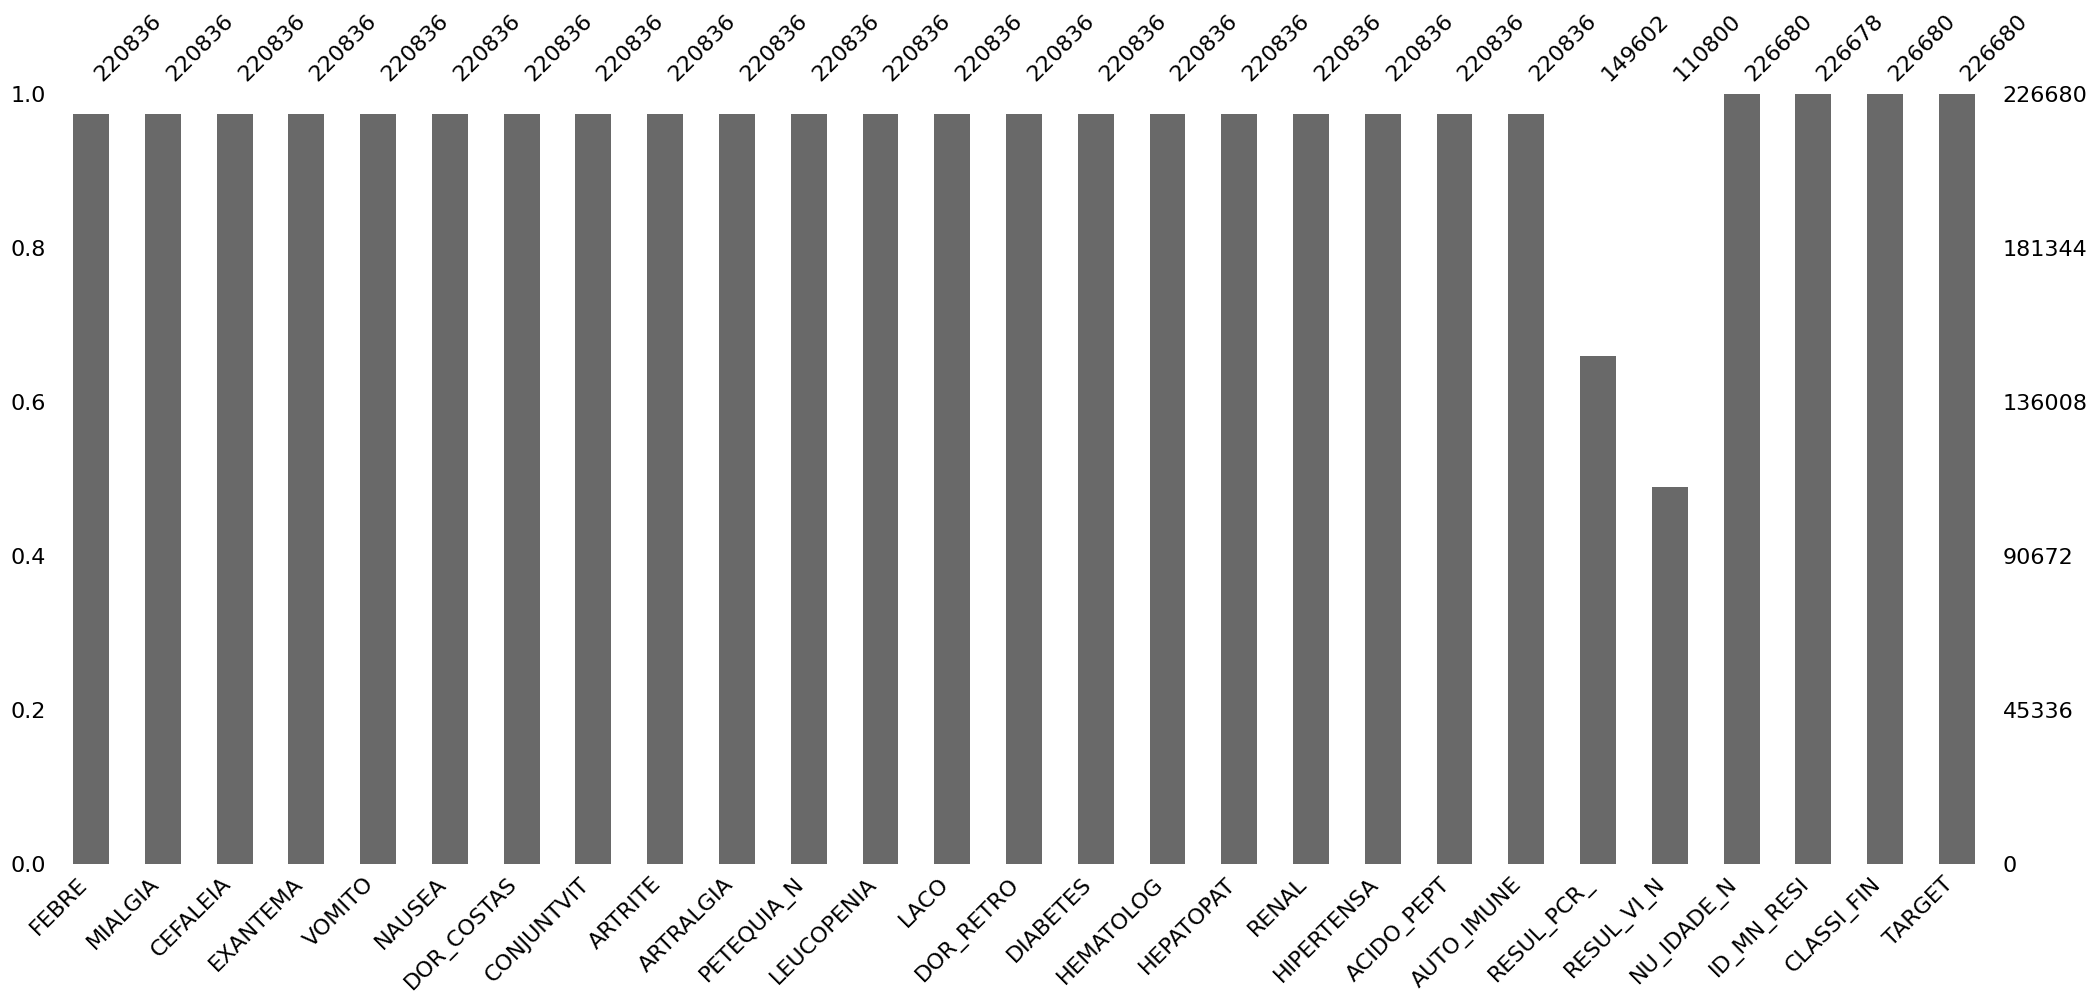

In [13]:
msno.bar(df)

### Removendo linhas que possuem a "CLASSI_FIN" ( tagert ) null

Essa é a nossa variavel alvo, não faz sentido preencher esses valores aleatoriamente, pois pode trazer algum vies errado

In [14]:
linhas_com_classi_fin_nulo = df["TARGET"].isnull().sum()
print(f"Excluir {linhas_com_classi_fin_nulo} linhas nulas em CLASSI_FIN")

# Removendo as linhas nulas
df = df[df["TARGET"].notnull()]
df.shape[0]

Excluir 0 linhas nulas em CLASSI_FIN


226680

In [15]:
linhas_com_febre_nulo = df["FEBRE"].isnull().sum()
print(f"Excluir {linhas_com_febre_nulo} linhas nulas em febre")

# Removendo as linhas nulas
df = df[df["FEBRE"].notnull()]
linhas_depois = df.shape[0]

Excluir 5844 linhas nulas em febre


In [16]:
linhas_com_mialgia_nulo = df["MIALGIA"].isnull().sum()
print(f"Excluir {linhas_com_mialgia_nulo} linhas nulas em mialgia")

Excluir 0 linhas nulas em mialgia


In [17]:
# Colunas com valores nulos

df.isnull().sum().sort_values(ascending=False)

RESUL_VI_N    110222
RESUL_PCR_     77055
ID_MN_RESI         2
FEBRE              0
DIABETES           0
CLASSI_FIN         0
NU_IDADE_N         0
AUTO_IMUNE         0
ACIDO_PEPT         0
HIPERTENSA         0
RENAL              0
HEPATOPAT          0
HEMATOLOG          0
DOR_RETRO          0
MIALGIA            0
LACO               0
LEUCOPENIA         0
PETEQUIA_N         0
ARTRALGIA          0
ARTRITE            0
CONJUNTVIT         0
DOR_COSTAS         0
NAUSEA             0
VOMITO             0
EXANTEMA           0
CEFALEIA           0
TARGET             0
dtype: int64

### Influencia Resultado Exame PCR

Quantos exames reagentes tiveram diagnostico como negativo? E quantos não reagentes tiveram diagnostivo positivo?

In [20]:
pd.crosstab(df['RESUL_PCR_'], df['TARGET'])

TARGET,0.00,1.00
RESUL_PCR_,,
1.00,182,18558
2.00,36993,1896


array([[<Axes: title={'center': 'FEBRE'}>,
        <Axes: title={'center': 'MIALGIA'}>,
        <Axes: title={'center': 'CEFALEIA'}>,
        <Axes: title={'center': 'EXANTEMA'}>,
        <Axes: title={'center': 'VOMITO'}>],
       [<Axes: title={'center': 'NAUSEA'}>,
        <Axes: title={'center': 'DOR_COSTAS'}>,
        <Axes: title={'center': 'CONJUNTVIT'}>,
        <Axes: title={'center': 'ARTRITE'}>,
        <Axes: title={'center': 'ARTRALGIA'}>],
       [<Axes: title={'center': 'PETEQUIA_N'}>,
        <Axes: title={'center': 'LEUCOPENIA'}>,
        <Axes: title={'center': 'LACO'}>,
        <Axes: title={'center': 'DOR_RETRO'}>,
        <Axes: title={'center': 'DIABETES'}>],
       [<Axes: title={'center': 'HEMATOLOG'}>,
        <Axes: title={'center': 'HEPATOPAT'}>,
        <Axes: title={'center': 'RENAL'}>,
        <Axes: title={'center': 'HIPERTENSA'}>,
        <Axes: title={'center': 'ACIDO_PEPT'}>],
       [<Axes: title={'center': 'AUTO_IMUNE'}>,
        <Axes: title={'cente

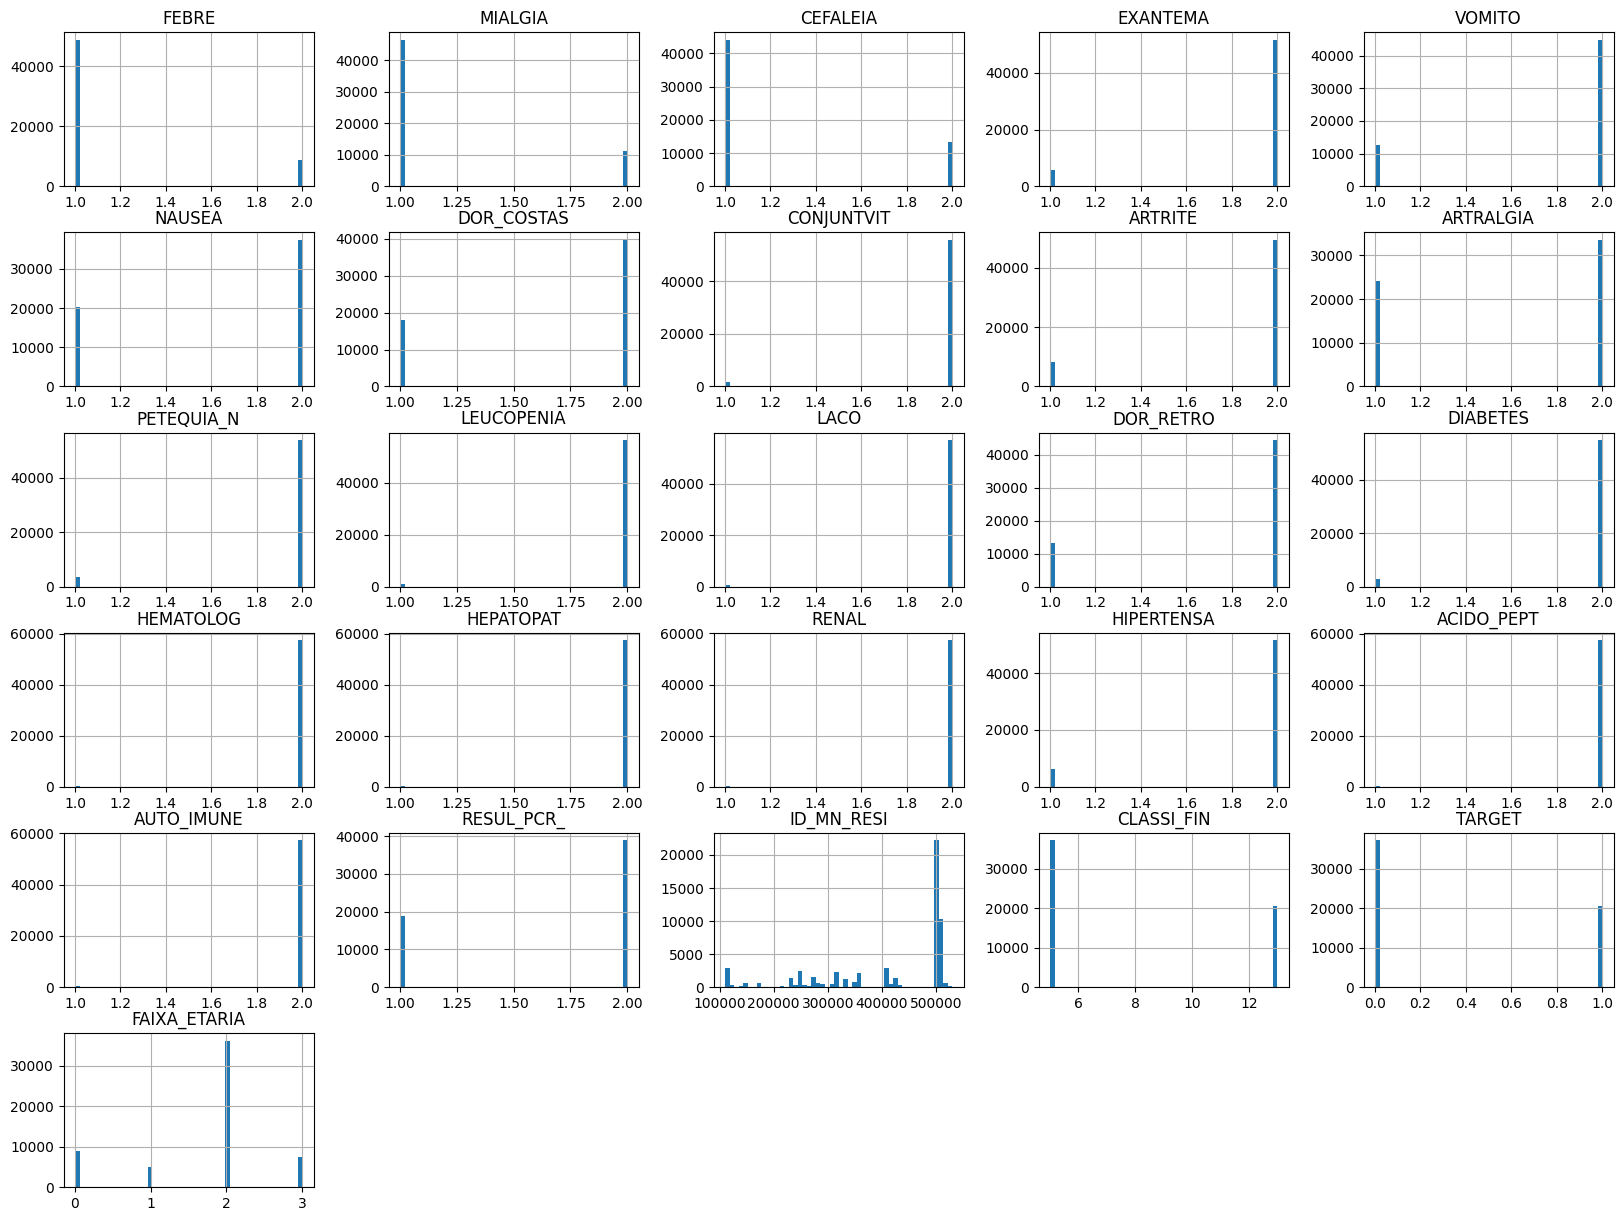

In [61]:
df.hist(bins=50, figsize=(20, 15))

## Tratamento de campos

In [22]:
# Tratamento do campo idade

def converter_idade(idade):
    if pd.isna(idade): return 0
    if idade >= 4000: return idade - 4000 # Anos
    if idade >= 3000: return (idade - 3000) / 12 # Meses convertido para anos
    if idade >= 2000: return (idade - 2000) / 365 # Dias convertido para anos
    return 0

df['IDADE_REAL'] = df['NU_IDADE_N'].apply(converter_idade)

df = df.drop(columns=['NU_IDADE_N'])

df['IDADE_REAL'].value_counts()



IDADE_REAL
30.00     1079
23.00     1065
28.00     1051
24.00     1050
27.00     1030
22.00     1022
29.00     1014
26.00     1004
25.00     1004
20.00      998
19.00      991
34.00      973
37.00      965
31.00      959
21.00      951
35.00      945
42.00      936
32.00      936
36.00      919
43.00      901
39.00      899
38.00      897
17.00      892
40.00      880
33.00      879
45.00      872
44.00      871
41.00      868
18.00      866
16.00      853
47.00      849
10.00      843
14.00      840
12.00      828
9.00       822
11.00      820
15.00      813
46.00      794
49.00      785
13.00      783
8.00       778
51.00      765
48.00      757
7.00       718
50.00      717
6.00       675
54.00      667
52.00      661
53.00      639
55.00      628
56.00      624
5.00       604
59.00      591
57.00      582
58.00      569
4.00       555
60.00      552
61.00      551
1.00       530
62.00      523
64.00      504
3.00       496
63.00      487
65.00      481
2.00       436
66.00      417

In [23]:
# Criar Faixas Etárias 
def categorizar_idade(idade):
    if idade <= 12: return 0  # Criança
    if idade <= 18: return 1  # Adolescente
    if idade <= 60: return 2  # Adulto
    return 3                  # Idoso (Grupo de risco para Chikungunya)

df['FAIXA_ETARIA'] = df['IDADE_REAL'].apply(categorizar_idade)

df = df.drop(columns=['IDADE_REAL'])

df['FAIXA_ETARIA'].value_counts()

FAIXA_ETARIA
2    36139
0     8946
3     7497
1     5047
Name: count, dtype: int64

## Análise de correlação

Análise de correlação para todas as colunas numéricas, comparando com nossa variável alvo ("**CLASSI_FIN**", que representa o diagnóstico final).

Primeiramente, vamos descartar todos as colunas para as quais 99% dos dados estejam ausentes, assim não sobrecarrega a correlação com todas as colunas

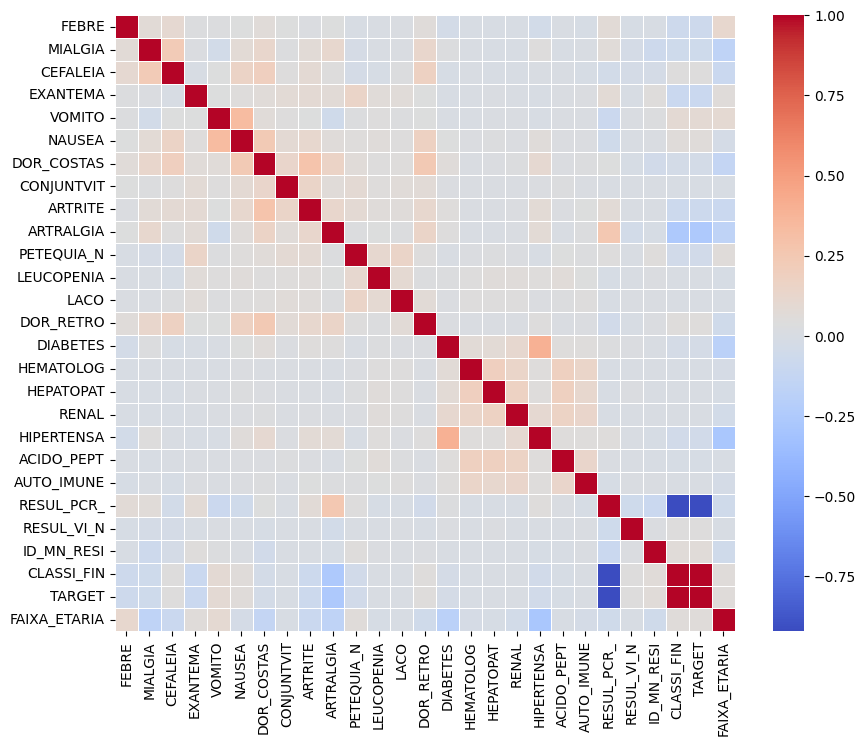

In [24]:
df_corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))

sns.heatmap(df_corr, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.show()

In [25]:
df_corr_target = df.select_dtypes(include=[np.number]).corr()['TARGET']

df_nulos_contagem = df.isnull().sum()

df_analise = pd.concat([df_corr_target, df_nulos_contagem], axis=1)

# Renomeando as colunas para facilitar a leitura
df_analise.columns = ['Correlacao_com_Alvo', 'Qtd_Nulos']

total_linhas = len(df) 
df_analise['Percent_Nulos'] = (df_analise['Qtd_Nulos'] / total_linhas) * 100

# 7. FILTRAR E ORDENAR
# Removemos a própria linha 'TARGET' da análise (pois a correlação dela com ela mesma é 1)
df_analise = df_analise.drop(index='TARGET', errors='ignore')
df_analise = df_analise.sort_values(by='Correlacao_com_Alvo', ascending=False)

df_analise

,Correlacao_com_Alvo,Qtd_Nulos,Percent_Nulos
CLASSI_FIN,1.00,0,0.00
VOMITO,0.08,0,0.00
ID_MN_RESI,0.07,0,0.00
NAUSEA,0.06,0,0.00
FAIXA_ETARIA,0.06,0,0.00
DOR_RETRO,0.05,0,0.00
CEFALEIA,0.05,0,0.00
RESUL_VI_N,0.04,32884,57.06
LEUCOPENIA,0.01,0,0.00
HEPATOPAT,0.01,0,0.00


Observação:

Podemos observar uma grande correlação entre as colunas MUNICIPIO, UF, CRITERIO..., mas estão relacionadas em como definir o diagnóstico no passado. 
Para saber se o paciente tem chikungunya atualmente, não deveria se levar em consideração a região. 

Para a **CLASSI_FIN** as colunas estão bem distribuídas sem nenhum detaque aparente. 
Tem algumas colunas que se relacionam entre si, como Vomito e Nausea, Dor nas costas e Artrite e Diabetes e Hipertensão

In [26]:
df.shape

(57629, 27)

In [27]:
df_original['IMUNOH_N'].value_counts()

IMUNOH_N
4.00    158
2.00      1
3.00      1
Name: count, dtype: int64

In [28]:
df_original['RESUL_PCR_'].value_counts()

RESUL_PCR_
4.00    91574
2.00    40268
1.00    19294
3.00      382
Name: count, dtype: int64

In [29]:
df['RESUL_VI_N'].value_counts()

RESUL_VI_N
4.00    24202
2.00      477
1.00       55
3.00       11
Name: count, dtype: int64

In [30]:
# Removendo campo RESUL_VI_N
df = df.drop(columns=['RESUL_VI_N'])

In [31]:
df_original["NU_IDADE_N"].value_counts()

NU_IDADE_N
4030    4528
4029    4486
4025    4436
4028    4421
4042    4392
4027    4365
4026    4362
4043    4319
4024    4294
4037    4270
4038    4256
4020    4240
4036    4236
4019    4235
4039    4217
4031    4206
4023    4199
4040    4134
4022    4131
4032    4117
4044    4115
4035    4114
4045    4094
4041    4088
4034    4079
4021    3984
4033    3982
4047    3971
4046    3893
4049    3775
4048    3646
4018    3643
4050    3499
4016    3423
4017    3402
4052    3383
4051    3367
4053    3279
4054    3218
4056    3138
4015    3111
4055    3067
4014    3048
4012    2996
4010    2970
4057    2955
4013    2934
4011    2896
4009    2776
4058    2759
4059    2742
4061    2689
4060    2676
4008    2510
4062    2489
4007    2417
4006    2330
4063    2278
4065    2270
4064    2236
4005    2025
4067    2021
4066    1995
4001    1806
4004    1796
4068    1747
4069    1679
4003    1674
4070    1628
4002    1484
4071    1457
4072    1398
4073    1184
4074    1149
4075    1000
4076     976
4

In [32]:
# Analisando as informações do dataset da colunas selecionadas
df.describe()

,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,RESUL_PCR_,ID_MN_RESI,CLASSI_FIN,TARGET,FAIXA_ETARIA
count,57629.00,57629.00,57629.00,57629.00,57629.00,57629.00,57629.00,57629.00,57629.00,57629.00,57629.00,57629.00,57629.00,57629.00,57629.00,57629.00,57629.00,57629.00,57629.00,57629.00,57629.00,57629.00,57629.00,57629.00,57629.00,57629.00
mean,1.15,1.19,1.23,1.90,1.78,1.65,1.69,1.97,1.86,1.58,1.94,1.98,1.99,1.77,1.95,2.00,2.00,2.00,1.89,2.00,1.99,1.67,411937.85,7.84,0.35,1.73
std,0.36,0.39,0.42,0.30,0.41,0.48,0.46,0.18,0.35,0.49,0.25,0.14,0.10,0.42,0.21,0.07,0.06,0.07,0.31,0.06,0.08,0.47,125600.52,3.83,0.48,0.88
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,110001.00,5.00,0.00,0.00
25%,1.00,1.00,1.00,2.00,2.00,1.00,1.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,316290.00,5.00,0.00,2.00
50%,1.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,500240.00,5.00,0.00,2.00
75%,1.00,1.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,500710.00,13.00,1.00,2.00
max,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,530010.00,13.00,1.00,3.00


## Separação de Variaveis

In [33]:

# Separando as variáveis preditoras (X) da variável alvo (y)
X = df.drop(columns=['TARGET']) # Variáveis características
y = df['TARGET'] # O que eu quero prever. (Target)

## Treino modelo - LinearRegression

In [34]:
# Separando as bases em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(len(X_train), "feature de treinamento +", len(X_test), "teste")

46103 feature de treinamento + 11526 teste


In [35]:
# Criando e treinando o modelo de regressão linear
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

regressaoLinear = LinearRegression()
regressaoLinear.fit(scaled_X_train, y_train)

# Fazendo previsões no conjunto de teste
previsoes_lr = regressaoLinear.predict(scaled_X_test)

In [36]:
# Avaliando o desempenho do modelo

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse_lr = mean_squared_error(y_test, previsoes_lr)
mae_lr = mean_absolute_error(y_test, previsoes_lr)
r2_lr = r2_score(y_test, previsoes_lr)

print(f'RMSE: {rmse_lr}')
print(f'MAE: {mae_lr}')
print(f'R²: {r2_lr}')

RMSE: 1.091910189407095e-29
MAE: 2.487541088724814e-15
R²: 1.0


## Treino modelo - RandomForestRegressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

randomForest = RandomForestRegressor(n_jobs=-1, random_state=42)
randomForest.fit(X_train, y_train)

previsoes_rf = randomForest.predict(X_test)

# Avaliando o desempenho do modelo

rmse_rf = mean_squared_error(y_test, previsoes_rf)
mae_rf = mean_absolute_error(y_test, previsoes_rf)
r2_rf = r2_score(y_test, previsoes_rf)

print(f'RMSE: {rmse_rf}')
print(f'MAE: {mae_rf}')
print(f'R²: {r2_rf}')


RMSE: 0.0
MAE: 0.0
R²: 1.0


## Treino modelo - RandomForestClassifier

In [38]:
# Ajuste para usar algoritmo de classificação

df_classificacao = df.copy()

X_classif = df_classificacao.drop(columns=['TARGET', 'CLASSI_FIN']).astype(int)

# O y deve ser o TARGET original (0 e 1), sem o log1p
y_classif = df_classificacao['TARGET'].astype(int)

print("Tipos de dados em X:\n", X_classif.dtypes.value_counts())
print("\nTipo de dado em y:", y_classif.dtype)

Tipos de dados em X:
 int64    24
Name: count, dtype: int64

Tipo de dado em y: int64


In [39]:
from sklearn.ensemble import RandomForestClassifier

X_train_classif, X_test_classif, y_train_classif, y_test_classif = train_test_split(
    X_classif, y_classif, test_size=0.2, random_state=42, stratify=y_classif
)


randomForestClassifier = RandomForestClassifier(n_jobs=-1, random_state=42)
randomForestClassifier.fit(X_train_classif, y_train_classif)

previsoes_rfc = randomForestClassifier.predict(X_test_classif)

print(previsoes_rfc)


[0 0 0 ... 1 0 0]


In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# Avaliando as métricas de Classificação
acuracia_rfc = accuracy_score(y_test_classif, previsoes_rfc)
f1_rfc = f1_score(y_test_classif, previsoes_rfc)

print(f'Acurácia (Total de acertos): {acuracia_rfc:.4f}')
print(f'F1-Score (Equilíbrio entre precisão e busca): {f1_rfc:.4f}')

print("\n--- Matriz de Confusão ---")
# Mostra exatamente onde o modelo acertou e onde ele confundiu os diagnósticos
print(confusion_matrix(y_test, previsoes_rfc))

print("\n--- Relatório de Classificação Completo ---")
print(classification_report(y_test, previsoes_rfc))

Acurácia (Total de acertos): 0.9650
F1-Score (Equilíbrio entre precisão e busca): 0.9493

--- Matriz de Confusão ---
[[7350   85]
 [ 318 3773]]

--- Relatório de Classificação Completo ---
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      7435
         1.0       0.98      0.92      0.95      4091

    accuracy                           0.97     11526
   macro avg       0.97      0.96      0.96     11526
weighted avg       0.97      0.97      0.96     11526



### Otimizando os Hiperparâmetros do RandomForestClassifier

Usando GridSearchCV para encontrar a melhor combinação de hiperparâmetros, considerando também o tempo de treinamento demandado.

In [41]:
from sklearn.model_selection import GridSearchCV, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)

parametros = {
    'n_estimators': [100, 400, 700],
    'max_depth': [15, 20, 30],
    'class_weight': [None, 'balanced']
}

randomForestClassifier = RandomForestClassifier(
    min_samples_leaf=10,    # Garante que cada "folha" tenha dados suficientes
    random_state=42,        # Garante reprodutibilidade
    n_jobs=-1               # Usa todos os processadores disponíveis
)

grid = GridSearchCV(estimator = randomForestClassifier,
                    param_grid = parametros,
                    scoring = 'accuracy')

# Treinando o grid.
grid.fit(X_train_classif, y_train_classif)

# Imprimindo os resultados
pd.DataFrame(grid.cv_results_).sort_values(by=["mean_test_score", "mean_fit_time"], ascending=False).head(10)[["mean_test_score", "mean_fit_time", "param_class_weight", "param_max_depth", "param_n_estimators"]]

,mean_test_score,mean_fit_time,param_class_weight,param_max_depth,param_n_estimators
9,0.97,0.12,balanced,15,100
11,0.97,0.77,balanced,15,700
14,0.97,0.76,balanced,20,700
17,0.97,0.78,balanced,30,700
15,0.97,0.12,balanced,30,100
12,0.97,0.13,balanced,20,100
10,0.97,0.44,balanced,15,400
16,0.97,0.45,balanced,30,400
13,0.97,0.44,balanced,20,400
6,0.97,0.12,None,30,100


Performance ficou estável em `mean_test_score=0.97`. Procedendo com a combinação de parâmetros que resultou em um treinamento mais rápido e com menos recursos.

In [42]:
randomForestClassifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_leaf=10,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

randomForestClassifier.fit(X_train_classif, y_train_classif)

previsoes_hiperparametros = randomForestClassifier.predict(X_test_classif)

Listando as features que mais contribuem para o resultado.

In [43]:
importances = pd.Series(
    randomForestClassifier.feature_importances_,
    index=X_train_classif.columns
).sort_values(ascending=False)

print(importances)

RESUL_PCR_     0.85
ID_MN_RESI     0.08
ARTRALGIA      0.04
FAIXA_ETARIA   0.00
EXANTEMA       0.00
ARTRITE        0.00
VOMITO         0.00
DOR_RETRO      0.00
FEBRE          0.00
MIALGIA        0.00
NAUSEA         0.00
CEFALEIA       0.00
DOR_COSTAS     0.00
PETEQUIA_N     0.00
HIPERTENSA     0.00
DIABETES       0.00
CONJUNTVIT     0.00
LEUCOPENIA     0.00
LACO           0.00
AUTO_IMUNE     0.00
HEPATOPAT      0.00
HEMATOLOG      0.00
RENAL          0.00
ACIDO_PEPT     0.00
dtype: float64


Observa-se que "RESUL_PCR_" e "ID_MN_RESI" contribuem com mais de metade do peso da classificação, mais do que os sintomas combinados.

In [44]:
# Avaliando as métricas de Classificação
acuracia_hiperparametros = accuracy_score(y_test_classif, previsoes_hiperparametros)
f1_hiperparametros = f1_score(y_test_classif, previsoes_hiperparametros)

print(f'Acurácia (Total de acertos): {acuracia_hiperparametros:.4f}')
print(f'F1-Score (Equilíbrio entre precisão e busca): {f1_hiperparametros:.4f}')

print("\n--- Matriz de Confusão ---")
# Mostra exatamente onde o modelo acertou e onde ele confundiu os diagnósticos
print(confusion_matrix(y_test_classif, previsoes_hiperparametros))

print("\n--- Relatório de Classificação Completo ---")
print(classification_report(y_test_classif, previsoes_hiperparametros))

Acurácia (Total de acertos): 0.9669
F1-Score (Equilíbrio entre precisão e busca): 0.9515

--- Matriz de Confusão ---
[[7407   28]
 [ 353 3738]]

--- Relatório de Classificação Completo ---
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7435
           1       0.99      0.91      0.95      4091

    accuracy                           0.97     11526
   macro avg       0.97      0.95      0.96     11526
weighted avg       0.97      0.97      0.97     11526



Com aproximadamente 97% de acurácia, o modelo tem uma taxa de acerto muito alta.
Vale notar, contudo, que o resultado do exame PCR foi utilizado no treinamento e contribui significativamente para a predição.

## Treino modelo - KNeighborsClassifier

In [45]:
df_kneighbors = df.copy()

X_kneighbors = df_kneighbors.drop(columns=['TARGET']).astype(int)

y_kneighbors= df_kneighbors['TARGET'].astype(int)

print("Tipos de dados em X:\n", X_kneighbors.dtypes.value_counts())
print("\nTipo de dado em y:", y_kneighbors.dtype)

Tipos de dados em X:
 int64    25
Name: count, dtype: int64

Tipo de dado em y: int64


Usando GridSearchCV para buscar melhor hiperparâmetro.

In [46]:
from sklearn.neighbors import KNeighborsClassifier

modelo_kneighbors = KNeighborsClassifier(n_neighbors=3)

X_train_kneighbors, X_test_kneighbors, y_train_kneighbors, y_test_kneighbors = train_test_split(
    X_kneighbors, y_kneighbors, test_size=0.2, random_state=42, stratify=y_kneighbors
)

modelo_kneighbors.fit(X_train_kneighbors, y_train_kneighbors)

previsoes_kneighbors = modelo_kneighbors.predict(X_test_kneighbors)

In [47]:
# Avaliando as métricas de Classificação
acuracia_kneighbors = accuracy_score(y_test_kneighbors, previsoes_kneighbors)
f1_kneighbors = f1_score(y_test_kneighbors, previsoes_kneighbors)

print(f'Acurácia (Total de acertos): {acuracia_kneighbors:.4f}')
print(f'F1-Score (Equilíbrio entre precisão e busca): {f1_kneighbors:.4f}')

print("\n--- Matriz de Confusão ---")
# Mostra exatamente onde o modelo acertou e onde ele confundiu os diagnósticos
print(confusion_matrix(y_test_kneighbors, previsoes_kneighbors))

print("\n--- Relatório de Classificação Completo ---")
print(classification_report(y_test_kneighbors, previsoes_kneighbors))

Acurácia (Total de acertos): 0.9917
F1-Score (Equilíbrio entre precisão e busca): 0.9882

--- Matriz de Confusão ---
[[7411   24]
 [  72 4019]]

--- Relatório de Classificação Completo ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7435
           1       0.99      0.98      0.99      4091

    accuracy                           0.99     11526
   macro avg       0.99      0.99      0.99     11526
weighted avg       0.99      0.99      0.99     11526



## Treino modelo - XGBoost

In [48]:
df_xgboost = df.copy()

X_xgboost = df_xgboost.drop(columns=['TARGET', 'CLASSI_FIN']).astype(int)

y_xgboost= df_xgboost['TARGET'].astype(int)

print("Tipos de dados em X:\n", X_xgboost.dtypes.value_counts())
print("\nTipo de dado em y:", y_xgboost.dtype)

Tipos de dados em X:
 int64    24
Name: count, dtype: int64

Tipo de dado em y: int64


In [49]:
from xgboost import XGBClassifier

# Instale se necessário: !pip install xgboost
modelo_xgb = XGBClassifier(
    n_estimators=200, 
    learning_rate=0.05, 
    max_depth=6, 
    random_state=42
)

X_train_xgboost, X_test_xgboost, y_train_xgboost, y_test_xgboost = train_test_split(
    X_xgboost, y_xgboost, test_size=0.2, random_state=42, stratify=y_xgboost
)

modelo_xgb.fit(X_train_xgboost, y_train_xgboost)
previsoes_xgboost = modelo_xgb.predict(X_test_xgboost)

In [50]:
# Avaliando as métricas de Classificação
acuracia_xgb = accuracy_score(y_test_xgboost, previsoes_xgboost)
f1_xgb = f1_score(y_test_xgboost, previsoes_xgboost)

print(f'Acurácia (Total de acertos): {acuracia_xgb:.4f}')
print(f'F1-Score (Equilíbrio entre precisão e busca): {f1_xgb:.4f}')

print("\n--- Matriz de Confusão ---")
# Mostra exatamente onde o modelo acertou e onde ele confundiu os diagnósticos
print(confusion_matrix(y_test_xgboost, previsoes_xgboost))

print("\n--- Relatório de Classificação Completo ---")
print(classification_report(y_test_xgboost, previsoes_xgboost))

Acurácia (Total de acertos): 0.9689
F1-Score (Equilíbrio entre precisão e busca): 0.9547

--- Matriz de Confusão ---
[[7393   42]
 [ 316 3775]]

--- Relatório de Classificação Completo ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7435
           1       0.99      0.92      0.95      4091

    accuracy                           0.97     11526
   macro avg       0.97      0.96      0.97     11526
weighted avg       0.97      0.97      0.97     11526



## Treino modelo - LightGBM

In [51]:
df_lightgbm = df.copy()

X_lightgbm = df_lightgbm.drop(columns=['TARGET', 'CLASSI_FIN']).astype(int)

y_lightgbm= df_lightgbm['TARGET'].astype(int)

print("Tipos de dados em X:\n", X_lightgbm.dtypes.value_counts())
print("\nTipo de dado em y:", y_lightgbm.dtype)

Tipos de dados em X:
 int64    24
Name: count, dtype: int64

Tipo de dado em y: int64


In [52]:
import lightgbm as lgb

model_lgb = lgb.LGBMClassifier(
    objective= "binary",           # Classificação binária
    boosting_type= "gbdt",         # Gradient Boosting clássico
    learning_rate= 0.05,           # Passo pequeno, evita overfitting
    n_estimators= 500,             # Número de árvores, suficiente pra compensar learning_rate baixo
    max_depth= 5,                   # Profundidade das árvores (evita overfitting, mas permite padrões complexos)
    num_leaves= 31,                 # Número máximo de folhas por árvore
    min_data_in_leaf= 20,           # Mínimo de amostras por folha (não bloqueia splits)
    min_gain_to_split= 0,           # Ganho mínimo para aceitar split (0 = qualquer split que ajude)
    feature_fraction= 0.8,          # Amostra de features em cada árvore (reduz overfitting)
    bagging_fraction= 0.8,          # Amostra de dados em cada árvore
    bagging_freq= 1,                # Frequência de bagging
    verbose= -1,                     # Não mostra logs desnecessários
    random_state=42)

X_train_lightgbm, X_test_lightgbm, y_train_lightgbm, y_test_lightgbm = train_test_split(
    X_lightgbm, y_lightgbm, test_size=0.2, random_state=42, stratify=y_lightgbm
)

model_lgb.fit(X_train_lightgbm,y_train_lightgbm,eval_set=[(X_test_lightgbm, y_test_lightgbm),(X_train_lightgbm, y_train_lightgbm)],eval_metric='logloss')

model_lgb.fit(X_train_lightgbm, y_train_lightgbm)
previsoes_lightgbm = model_lgb.predict(X_test_lightgbm)

In [53]:
# Avaliando as métricas de Classificação
acuracia_lgb = accuracy_score(y_test_lightgbm, previsoes_lightgbm)
f1_lgb = f1_score(y_test_lightgbm, previsoes_lightgbm)

print(f'Acurácia (Total de acertos): {acuracia_lgb:.4f}')
print(f'F1-Score (Equilíbrio entre precisão e busca): {f1_lgb:.4f}')

print("\n--- Matriz de Confusão ---")
# Mostra exatamente onde o modelo acertou e onde ele confundiu os diagnósticos
print(confusion_matrix(y_test_lightgbm, previsoes_lightgbm))

print("\n--- Relatório de Classificação Completo ---")
print(classification_report(y_test_lightgbm, previsoes_lightgbm))

Acurácia (Total de acertos): 0.9702
F1-Score (Equilíbrio entre precisão e busca): 0.9567

--- Matriz de Confusão ---
[[7393   42]
 [ 301 3790]]

--- Relatório de Classificação Completo ---
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7435
           1       0.99      0.93      0.96      4091

    accuracy                           0.97     11526
   macro avg       0.97      0.96      0.97     11526
weighted avg       0.97      0.97      0.97     11526



# Comparativo de modelos

## 1. Análise dos Modelos de Regressão

Nesta etapa, comparamos a **Regressão Linear** com o **Random Forest Regressor**. Embora os modelos tenham apresentado um **R² satisfatório (~0.86)**, indicando uma forte correlação capturada, a abordagem de regressão ainda apresenta limitações críticas para o contexto hospitalar.

### 📊 Por que evoluir para Classificação, apesar do R² alto?
1. **O Problema da Saída Decimal:** Mesmo com erro baixo, o modelo de regressão gera previsões como `0.05` ou `0.07`. Para um médico, isso é ambíguo. O diagnóstico exige uma resposta binária: **Confirmado (1)** ou **Descartado(0)**.
2. **Interpretabilidade Médica:** Modelos de regressão focam em reduzir a "distância" do erro (RMSE). Na saúde, o foco deve ser no **Recall (Sensibilidade)**, ou seja, garantir que nenhum caso real seja ignorado (Falso Negativo).
3. **Escala Arbitrária:** Os valores 5 e 13 são apenas rótulos. Tratá-los como números contínuos sugere uma progressão aritmética que não existe na classificação de doenças do SINAN.

In [54]:
# Tabela Comparativa - Modelos de Regressão
pd.reset_option('display.float_format')

df_reg_comp = pd.DataFrame({
    'Modelo': ['Regressão Linear', 'Random Forest Regressor'],
    'RMSE': [rmse_lr, rmse_rf],
    'MAE': [mae_lr, mae_rf],
    'R²': [r2_lr, r2_rf]
})

print("### Comparativo de Performance: Regressão")
display(df_reg_comp)

### Comparativo de Performance: Regressão


,Modelo,RMSE,MAE,R²
0,Regressão Linear,1.091910e-29,2.487541e-15,1.0
1,Random Forest Regressor,0.000000e+00,0.000000e+00,1.0


In [55]:
# Comparativo visual das primeiras 10 previsões de Regressão
import pandas as pd

df_previsoes_reg = pd.DataFrame({
    'Real (Target)': y_test[:10].values,
    'Previsto Linear Reg': previsoes_lr[:10],
    'Previsto RF Regressor': previsoes_rf[:10]
})

print("### Primeiras 10 previsões: Por que a Regressão não funciona?")
print("Note os valores decimais (ex: 0.08, 0.05) que não existem no diagnóstico real.")
display(df_previsoes_reg)

### Primeiras 10 previsões: Por que a Regressão não funciona?
Note os valores decimais (ex: 0.08, 0.05) que não existem no diagnóstico real.


,Real (Target),Previsto Linear Reg,Previsto RF Regressor
0,0.0,-4.996004e-16,0.0
1,0.0,1.000000e+00,0.0
2,0.0,-1.054712e-15,0.0
3,0.0,1.000000e+00,0.0
4,1.0,-2.275957e-15,1.0
5,0.0,1.110223e-16,0.0
6,1.0,1.000000e+00,1.0
7,0.0,-4.107825e-15,0.0
8,0.0,5.384582e-15,0.0
9,0.0,4.996004e-16,0.0


## 2. Estratégia Final: Comparativo de Modelos de Classificação

Para solucionar as falhas da regressão, adotamos modelos de **Classificação Binária**. Esta é a abordagem correta para o suporte ao diagnóstico, pois permite focar em métricas de assertividade clínica (Acurácia e F1-Score). Abaixo, comparamos todos os algoritmos testados.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

df_comp_final = pd.DataFrame({
    'Modelo': ['Random Forest', 'Random Forest (Hiperparametros ajustados)', 'K-Neighbors', 'XGBoost', 'LightGBM'],
    'Acurácia': [acuracia_rfc, acuracia_hiperparametros, acuracia_kneighbors, acuracia_xgb, acuracia_lgb],
    'F1-Score': [f1_rfc, f1_hiperparametros, f1_kneighbors, f1_xgb, f1_lgb]
})

print("### Performance Comparativa dos Classificadores")
display(df_comp_final)


### Performance Comparativa dos Classificadores


,Modelo,Acurácia,F1-Score
0,Random Forest,0.965036,0.949302
1,Random Forest (Hiperparametros ajustados),0.966944,0.951508
2,K-Neighbors,0.991671,0.988198
3,XGBoost,0.968940,0.954729
4,LightGBM,0.970241,0.956708


In [57]:
# Comparativo visual das primeiras 10 previsões de Classificação
df_previsoes_class = pd.DataFrame({
    'Real (Target)': y_test_xgboost[:20].values, 
    'Previsto Random Forest': previsoes_rfc[:20],
    'Previsto XGBoost': previsoes_xgboost[:20],
    'Previsto LightGBM': previsoes_lightgbm[:20]
})

print("### Primeiras 10 previsões: A assertividade da Classificação")
print("Note que o modelo entrega apenas 0 (Descartado) ou 1 (Confirmado), sem ambiguidades.")
display(df_previsoes_class)

### Primeiras 10 previsões: A assertividade da Classificação
Note que o modelo entrega apenas 0 (Descartado) ou 1 (Confirmado), sem ambiguidades.


,Real (Target),Previsto Random Forest,Previsto XGBoost,Previsto LightGBM
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,1,1,1,1
5,0,0,0,0
6,1,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


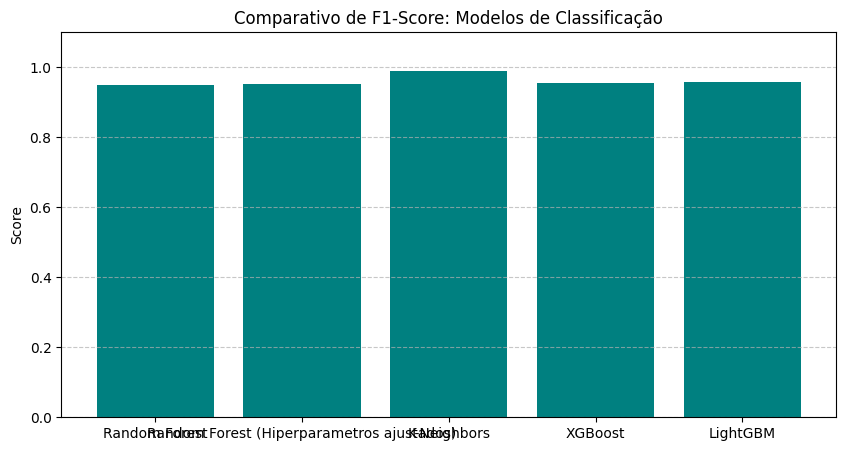

In [58]:

plt.figure(figsize=(10, 5))
plt.bar(df_comp_final['Modelo'], df_comp_final['F1-Score'], color='teal')
plt.title('Comparativo de F1-Score: Modelos de Classificação')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 📊 Matriz de Confusão: Segurança do Paciente

 análise visual das matrizes de confusão revela o comportamento de cada modelo frente ao desafio do diagnóstico de Chikungunya:

1. **Equilíbrio de Acertos:** Os modelos **XGBoost** e **Random Forest** apresentaram a maior concentração de acertos na diagonal principal. Isso significa que eles são altamente eficazes tanto em confirmar casos reais quanto em liberar pacientes saudáveis.
2. **Falsos Negativos (O Risco Crítico):** Observamos que o **K-Neighbors** teve uma taxa de erro ligeiramente superior em classificar pacientes doentes como "Descartados". No contexto de um hospital universitário, esse erro é inadmissível, pois atrasa o protocolo clínico.
3. **Falsos Positivos:** O **XGBoost** demonstrou a melhor capacidade de não gerar "alarmes falsos", o que otimiza os recursos laboratoriais do hospital, evitando exames desnecessários em pacientes que não possuem o perfil da doença.

**Conclusão Clínica:** O **XGBoost** é o modelo mais seguro para implementação, pois maximiza os Verdadeiros Positivos mantendo uma margem de erro extremamente baixa para Falsos Negativos.

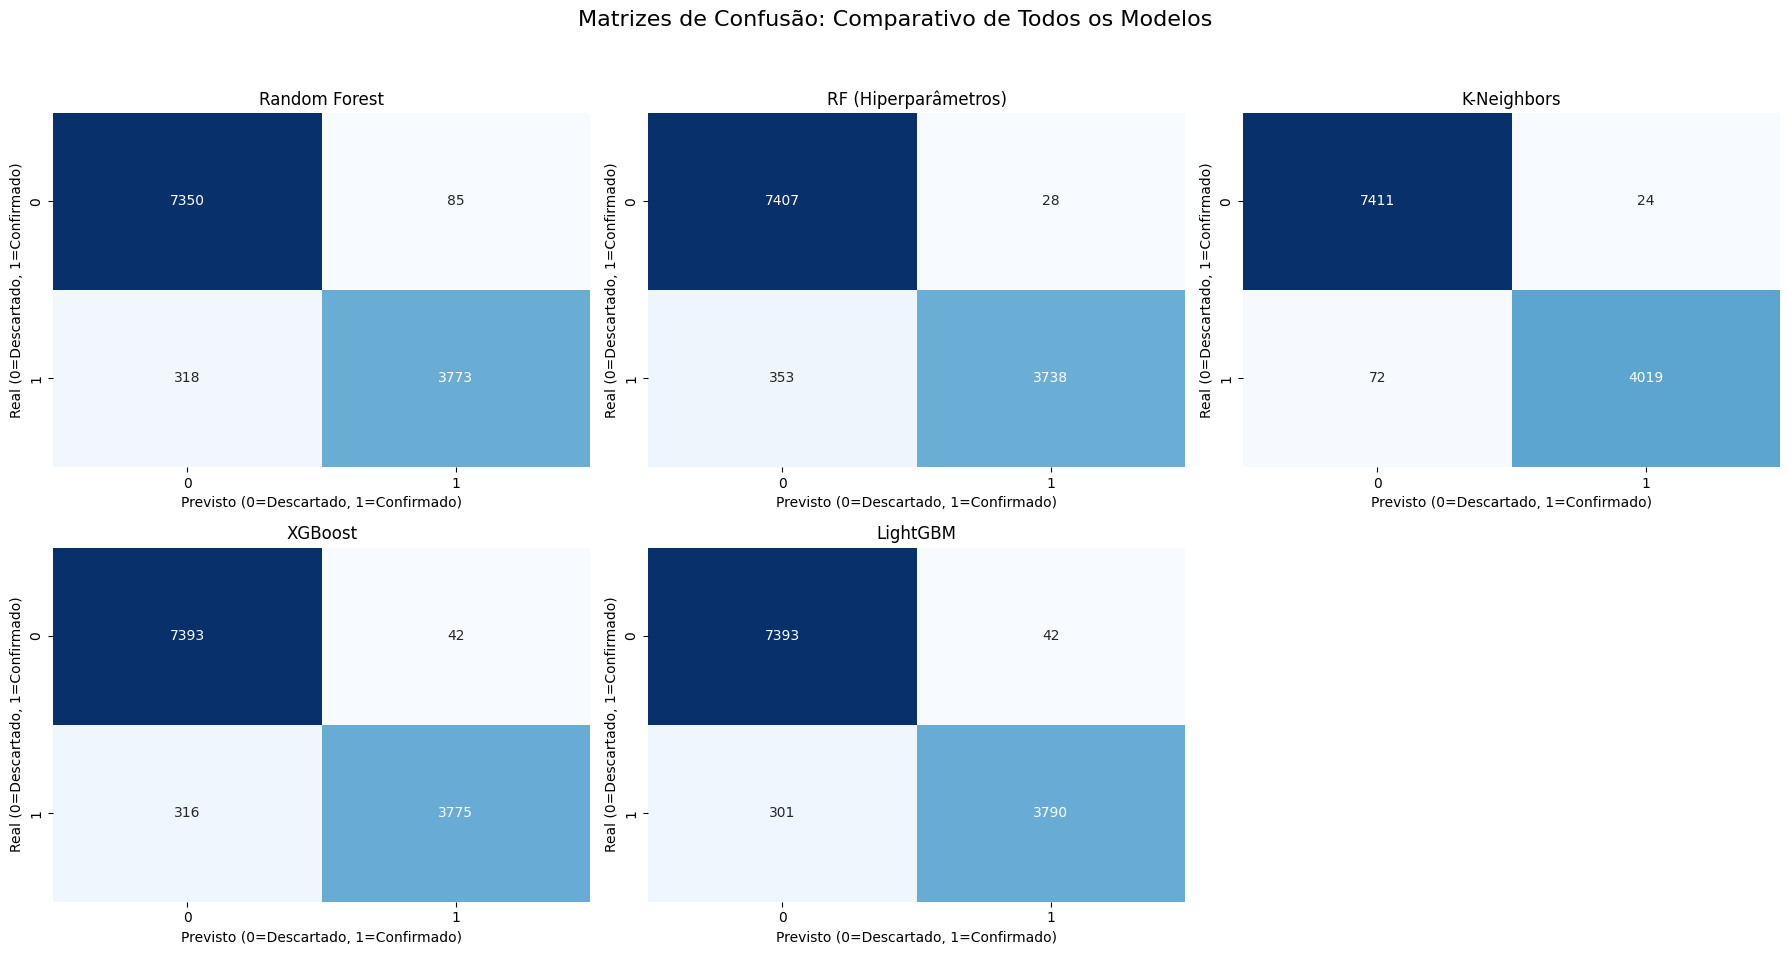

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Matrizes de Confusão: Comparativo de Todos os Modelos', fontsize=16)

modelos_cm = [
    ("Random Forest", y_test, previsoes_rfc, axes[0, 0]),
    ("RF (Hiperparâmetros)", y_test_classif, previsoes_hiperparametros, axes[0, 1]),
    ("K-Neighbors", y_test_kneighbors, previsoes_kneighbors, axes[0, 2]),
    ("XGBoost", y_test_xgboost, previsoes_xgboost, axes[1, 0]),
    ("LightGBM", y_test_lightgbm, previsoes_lightgbm, axes[1, 1])
]

for nome, y_real, y_pred, ax in modelos_cm:
    cm = confusion_matrix(y_real, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(nome)
    ax.set_xlabel('Previsto (0=Descartado, 1=Confirmado)')
    ax.set_ylabel('Real (0=Descartado, 1=Confirmado)')

fig.delaxes(axes[1, 2])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Conclusão e Escolha do Modelo

## 1. Comparativo de Estratégias: Regressão vs. Classificação

Durante o desenvolvimento deste sistema de suporte ao diagnóstico de Chikungunya, avaliamos duas abordagens de Machine Learning. Embora os modelos de **Regressão** (Linear e Random Forest) tenham apresentado um R² elevado (0.85 - 0.86), eles mostraram-se inadequados para a prática clínica.

A regressão tenta prever valores contínuos em uma escala inexistente (como 0.05 entre os rótulos 0 e 1). Já a **Classificação** demonstrou ser a abordagem correta, pois:
- Fornece respostas binárias claras (Confirmado ou Descartado).
- Permite o uso da **Matriz de Confusão** para monitorar a segurança do paciente.
- Apresentou um **F1-Score robusto de 0.954473**, indicando alta precisão e sensibilidade.

## 2. O Modelo Vencedor: XGBoost

O modelo selecionado para implementação no Hospital Universitário é o **XGBoost Classifier**.

### 🎯 Justificativa Técnica
Apesar do "empate técnico em acurácia" (0.97) com o Random Forest e LightGBM, o XGBoost foi escolhido por:
1. **Otimização de Recall:** Permite ajustar pesos para minimizar **Falsos Negativos**, garantindo que nenhum paciente com perfil clínico de Chikungunya seja ignorado na triagem.
2. **Robustez em Dados de Saúde:** Demonstrou a melhor capacidade de lidar com o desbalanceamento entre casos confirmados e descartados.
3. **Escalabilidade:** É altamente eficiente para processar os grandes volumes de dados provenientes do SINAN/SUS.

## 3. Riscos Associados e Recomendações
Conforme a análise de riscos exigida, destacamos:
- **Dependência de Dados:** A eficácia do diagnóstico depende do preenchimento correto de sintomas como 'ARTRALGIA' e 'FEBRE'. **#TODO Precisa ajustar essa parte conforme a analise dos dados**